# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
weather_api_key

'bd2b6645aae57f07b41a26525d991ec2'

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


# lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# initial count 
count_one = 0
set_one = 1

# loops for dataframe 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 3 of Set 1 | acapulco
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | upington
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | santa rosa
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | derzhavinsk
Processing Record 16 of Set 1 | muscat
Processing Record 17 of Set 1 | martvili
Processing Record 18 of Set 1 | khatanga
City not found. Skipping...
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Set 1 | vaini
City not found. Skipping...
Processing Record

Processing Record 42 of Set 4 | iralaya
Processing Record 43 of Set 4 | lofthus
City not found. Skipping...
Processing Record 44 of Set 4 | fushun
Processing Record 45 of Set 4 | port augusta
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | okhotsk
Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | troitskoye
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | lakes entrance
Processing Record 3 of Set 5 | honiara
Processing Record 4 of Set 5 | chara
Processing Record 5 of Set 5 | natal
City not found. Skipping...
Processing Record 6 of Set 5 | santa isabel do rio negro
Processing Record 7 of Set 5 | boa vista
Processing Record 8 of Set 5 | guarapari
Processing Record 9 of Set 5 | sorland
Processing Record 10 of Set 5 | ranong
Processing Record 11 of Set 5 | oksfjord
Processing Record 12 of Set 5 | suntar
Processing Record 13 of Set 5 | lermontovka
Processing Record 14 of Set 5 | kuusamo
Processing Record 15 of Se

Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | carlisle
Processing Record 30 of Set 8 | biga
Processing Record 31 of Set 8 | estelle
Processing Record 32 of Set 8 | jacareacanga
Processing Record 33 of Set 8 | akhtyrskiy
Processing Record 34 of Set 8 | kavieng
Processing Record 35 of Set 8 | manakara
Processing Record 36 of Set 8 | rio gallegos
Processing Record 37 of Set 8 | wattegama
Processing Record 38 of Set 8 | san carlos de bariloche
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | moranbah
Processing Record 41 of Set 8 | crossford
Processing Record 42 of Set 8 | grand gaube
City not found. Skipping...
Processing Record 43 of Set 8 | ust-omchug
Processing Record 44 of Set 8 | chunhuhub
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | nizhniy tsasuchey
Processing Record 47 of Set 8 | bajil
Processing Record 48 of Set 8 | khromtau
Processing Record 49 of Set 8 | khandbari
Processing Record 1 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# create a dictionary for establishing dataframe
weather = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


dataframe = pd.DataFrame(weather)

In [31]:
dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,31,NZ,1585519119,78,-46.19,168.86,57.99,5.99
1,saint-philippe,20,RE,1585519119,78,-21.36,55.77,78.80,3.36
2,acapulco,5,MX,1585519064,66,16.86,-99.89,87.80,6.93
3,katsuura,75,JP,1585519120,75,35.13,140.30,43.00,13.87
4,ushuaia,40,AR,1585518913,58,-54.80,-68.30,53.60,18.34
...,...,...,...,...,...,...,...,...,...
538,santa maria,38,PH,1585519177,72,17.49,120.43,76.06,2.66
539,urcos,88,PE,1585519303,24,-13.69,-71.62,59.81,7.63
540,sydney,75,AU,1585519201,100,-33.87,151.21,68.00,2.24
541,abu samrah,0,IN,1585519305,22,24.60,72.70,63.45,4.83


In [32]:
dataframe.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

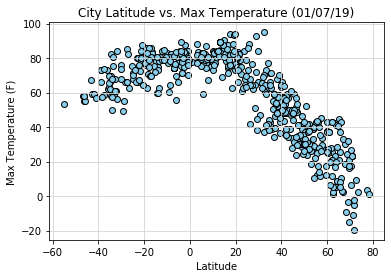

In [33]:
plt.scatter(dataframe["Lat"],dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

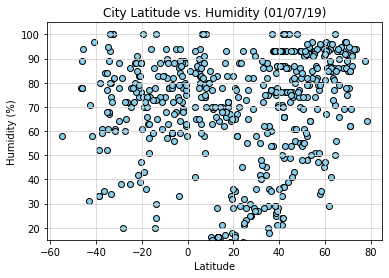

In [34]:
plt.scatter(dataframe["Lat"],dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

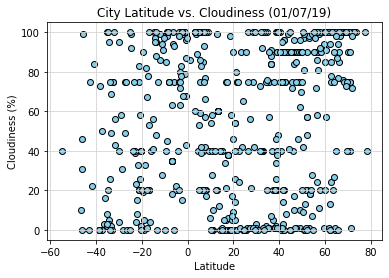

In [35]:
plt.scatter(dataframe["Lat"],dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

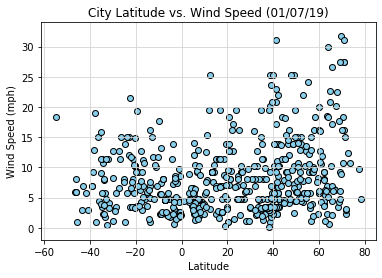

In [36]:
plt.scatter(dataframe["Lat"],dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [39]:
# Create Northern and Southern Hemisphere DataFrames

northern = dataframe.loc[pd.to_numeric(dataframe["Lat"]).astype(float) > 0, :]
southern = dataframe.loc[pd.to_numeric(dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.14x + 95.03
The r-squared is: -0.9009118715620696
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


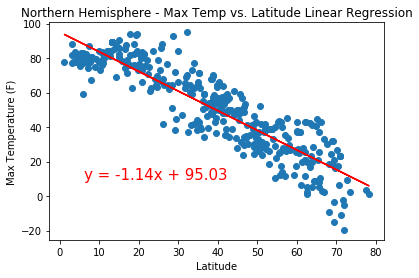

In [41]:
x_values = pd.to_numeric(northern['Lat']).astype(float)
y_values = pd.to_numeric(northern['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.42x + 81.39
The r-squared is: 0.6055841358583892
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


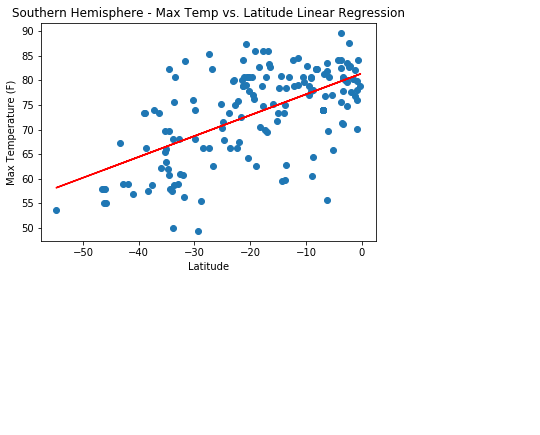

In [42]:
x_values = pd.to_numeric(southern['Lat']).astype(float)
y_values = pd.to_numeric(southern['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.36x + 54.11
The r-squared is: 0.29323234613027355
The regression does not display much of a correlation between the data sets.


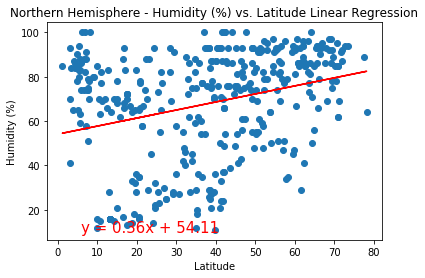

In [43]:
x_values = pd.to_numeric(northern['Lat']).astype(float)
y_values = pd.to_numeric(northern['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.11x + 73.66
The r-squared is: 0.08626838881081884
The regression does not display much of a correlation between the data sets.


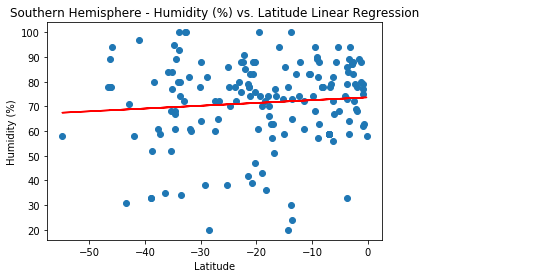

In [44]:
x_values = pd.to_numeric(southern['Lat']).astype(float)
y_values = pd.to_numeric(southern['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 39.11
The r-squared is: 0.21545892383504403
The regression does not display much of a correlation between the data sets.


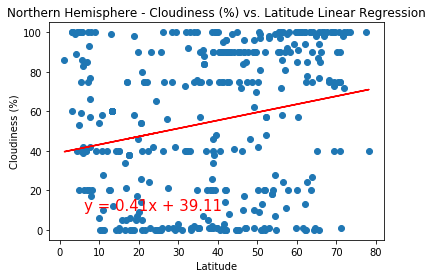

In [45]:
x_values = pd.to_numeric(northern['Lat']).astype(float)
y_values = pd.to_numeric(northern['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.05x + 72.86
The r-squared is: 0.38305193437111035
The regression does not display much of a correlation between the data sets.


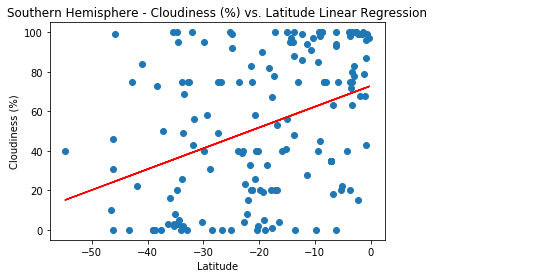

In [46]:
x_values = pd.to_numeric(southern['Lat']).astype(float)
y_values = pd.to_numeric(southern['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 5.43
The r-squared is: 0.2740786836913528
The regression does not display much of a correlation between the data sets.


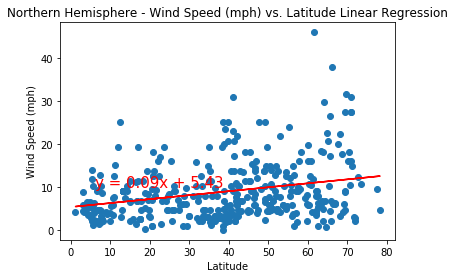

In [47]:
x_values = pd.to_numeric(northern['Lat']).astype(float)
y_values = pd.to_numeric(northern['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 5.58
The r-squared is: -0.20507868023085635
The regression does not display much of a correlation between the data sets.


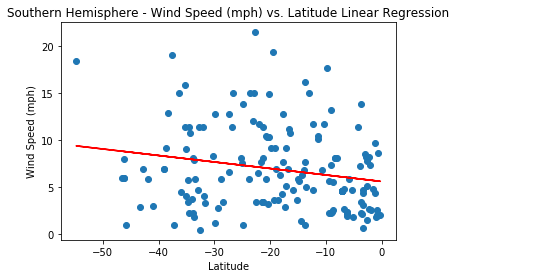

In [48]:
x_values = pd.to_numeric(southern['Lat']).astype(float)
y_values = pd.to_numeric(southern['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()